# Project: Investigate TMDB movie data

### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>### **Overview**
>TMDb movies dataset is used in this analysis. 
>This data set contains information about 10,000 movies collected from (TMDb), including user ratings and revenue.
>Certain columns, like ‘cast’,and ‘genres’, contain multiple values separated by pipe (|) characters.
>There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,
accounting for inflation over time

## Project Overview
> this analysis is done on The Movies (TMDb) Database. and based on the following:
<ul>
<li><a href="#Q1">1. What is the most popular movie genre?</a></li>
<li><a href="#Q2">2. What are the most popular casts?</a></li>
<li><a href="#Q3">3. Getting Correlations</a></li>
<li><a href="#Q4">4. In what year has the largest number of movies released?</a></li>
<li><a href="#Q5">5. Which year has achieved the highest and lowest profit?</a></li>
<li><a href="#Q6">6. What are the movies which have the highest rating by voters?</a></li>
<li><a href="#Q7">7. Which Movies have the most and least profit?</a></li>
<li><a href="#Q8">8. What are the most popular movies?</a></li>
</ul>


In [172]:
#importing important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> In this section of the report, I will load  the data, checking for cleanliness, and then triming and cleaning the dataset for analysis. 

In [173]:
# Reading the data
movi = pd.read_csv('tmdb-movies.csv', sep=',')
movi.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The tmdb dataset contains 10866 rows and 21 columns.

In [174]:
movi.shape

(10866, 21)

View of datasets to check for correct datatypes, null values, duplicate values

In [175]:
movi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Data Cleaning 
> Next i'm going to do some cleaning processes on th data to make it ready for the analysis.


In [176]:
#removing the unused columns from the dataset
movi.drop(labels = ['imdb_id','homepage', 'budget_adj', 'revenue_adj'],axis =1,inplace =True)

In [177]:
movi.shape

(10866, 17)

### Checking for duplicate Values

In [178]:
#checking duplicate
sum(movi.duplicated())

1

In [179]:
#removing the duplicate
movi.drop_duplicates(keep= 'first',inplace = True)

In [180]:
#checking duplicate
sum(movi.duplicated())

0

### Checking for missing values

In [181]:
# The count of the null value
movi.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [182]:
# Removing the rows that have the null values
movi.dropna(inplace=True)

In [183]:
#cheking again if there are any missing values
movi.isnull().sum().any()

False

In [184]:
movi.shape

(7031, 17)

In [185]:
#Making a list of some columns
short_list = ['runtime','budget','revenue']

#replacing all values from '0' to NAN in the list
movi[short_list] = movi[short_list].replace(0, np.NAN)

#Removing all the row which has NaN value in the list
movi.dropna(subset = short_list, inplace = True)

In [186]:
movi.shape

(3445, 17)

In [187]:
movi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3445 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3445 non-null   int64  
 1   popularity            3445 non-null   float64
 2   budget                3445 non-null   float64
 3   revenue               3445 non-null   float64
 4   original_title        3445 non-null   object 
 5   cast                  3445 non-null   object 
 6   director              3445 non-null   object 
 7   tagline               3445 non-null   object 
 8   keywords              3445 non-null   object 
 9   overview              3445 non-null   object 
 10  runtime               3445 non-null   float64
 11  genres                3445 non-null   object 
 12  production_companies  3445 non-null   object 
 13  release_date          3445 non-null   object 
 14  vote_count            3445 non-null   int64  
 15  vote_average        

# Wrangling data typs

In [188]:
#converting the datatype of column(release_date) to datetime and (budget, revenue) to Int64
movi['release_date'] = pd.to_datetime(movi['release_date'])
movi.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [189]:
movi.shape

(3445, 17)

## Cleaning Summary

* Some columns that are  not necessary for the analysis have been dropped ('budget_adj','imdb_id', 'revenue_adj','homepage').
* The duplicates have been removed.
* some necessary changes in data types have been made.

<a id='eda'></a>
## Exploratory Data Analysis


<a id='Q1'></a>
# 1. What is the most popular movie genre?

> Making a function that handles the columns which have been seperated by '|' like (Genres, Director, Cast, keywords, and production_companies).

In [190]:
#this function takes a column as an argument and keeps the track of it.
def separete(col_name):
    #separating the string of column with '|'
    separete = movi[col_name].str.cat(sep = '|')
    
    #storing the separated values. 
    separete = pd.Series(separete.split('|'))
    
    #sorting the values in descending order.
    freq = separete.value_counts(ascending = False)
    
    return freq

In [191]:
#calling the separete function to store values in a variable.
genr = separete('genres')
#printing top 10 values
Top_10_genres =genr.head(10)

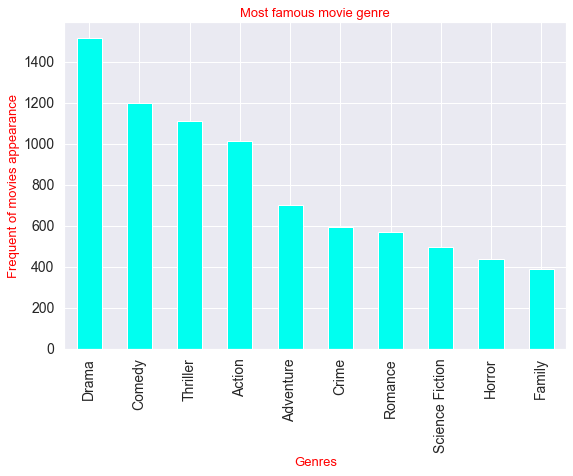

In [219]:
#ploting
genr_bar = Top_10_genres.plot.bar(color = '#00FFF0', fontsize = 14)

#Graph size by (width, height)
genr_bar.figure.set_size_inches(9, 6);

#Graph labeling
plt.title('Most famous movie genre', color = 'red', fontsize = '13')
plt.xlabel('Genres', color = 'red', fontsize = '13')
plt.ylabel('Frequent of movies appearance', color = 'red', fontsize = '13');

* Drama the most popular movie genre.

<a id='Q2'></a>
# 2. What are the most popular casts?

In [193]:
#calling the separete function to store values in a variable.
casts = separete('cast')
#printing top 10 value
Top_10_cast = casts.head(10)

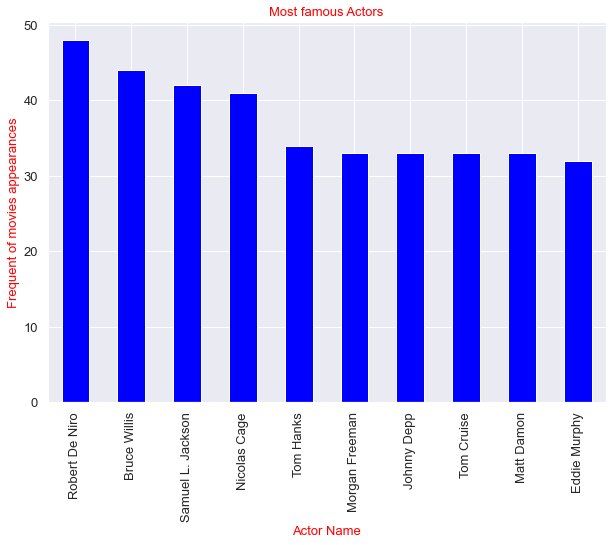

In [217]:
#plot
bar1 = Top_10_cast.plot.bar(color = 'blue', fontsize = 13)

#Graph size by (width, height)
bar1.figure.set_size_inches(10, 7);

#Graph labeling
plt.title('Most famous Actors', color = 'red', fontsize = '13')
plt.xlabel('Actor Name', color = 'red', fontsize = '13')
plt.ylabel('Frequent of movies appearances', color = 'red', fontsize = '13');

* Robert De Niro is the most popular actor.

In [195]:
#calling the separete function to store values in a variable.
directors = separete('director')
#printing top 10 values
directors.head(10)

Steven Spielberg     27
Clint Eastwood       20
Ridley Scott         20
Steven Soderbergh    17
Tim Burton           17
Martin Scorsese      15
Renny Harlin         15
Robert Rodriguez     15
Brian De Palma       14
Oliver Stone         14
dtype: int64

* Steven Spielberg is the most popular director.

In [196]:
#calling the separete function to store values in a variable.
keywords = separete('keywords')
#printing top 10 values
keywords.head(10)

based on novel          159
duringcreditsstinger     96
dystopia                 95
sex                      82
new york                 73
independent film         66
murder                   66
prison                   66
sport                    66
female nudity            57
dtype: int64

* Based On Novel is the most popular keywords.

<a id ='Q3'></a>
# 3. Getting Correlations

####  Runtime vs Popularity Correlation 

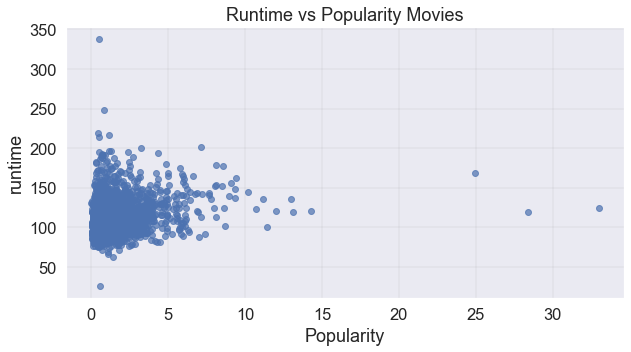

In [197]:
def scatter_plot(movi, X, Y):
  x1 = movi[X]
  y1 = movi[Y]
  fig, ax = plt.subplots(figsize=(10, 5))

  #alpha customization for all scatter plot dots
  ax.scatter(x1, y1, alpha=0.70)
 
 
  # axes labeling
  ax.set_title('Runtime vs Popularity Movies')
  ax.set_xlabel('Popularity')
  ax.set_ylabel('runtime')
 

  #adds major gridlines
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
  plt.show()
scatter_plot(movi, 'popularity', 'runtime')

In [198]:
movi['popularity'].corr(movi['runtime'])

0.22591183888860533

>The above figure shows a weak correlation between runtime and popularity of movies.

####  Profit vs Revenue Correlation 

In [203]:
#creating a new profit column
movi['profit'] = movi['revenue'] - movi['budget'] 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


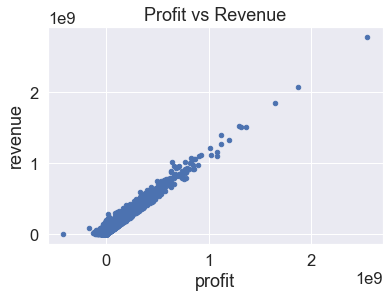

In [220]:
# Profit vs Revenue Correlation
movi.plot(x='profit', y='revenue', kind='scatter', title = 'Profit vs Revenue');

In [201]:
movi['profit'].corr(movi['revenue'])

0.979474177175267

>The above figure shows a strong correlation between profit and revenues of movies.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


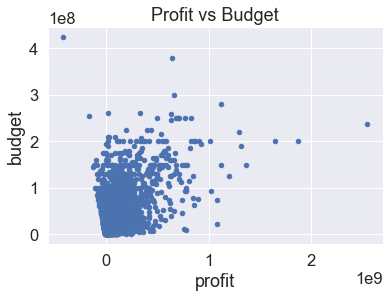

In [207]:
# Profit vs Budget Correlation 
movi.plot(x='profit', y='budget', kind='scatter', title = 'Profit vs Budget');

In [206]:
movi['profit'].corr(movi['budget'])

0.5230982726703748

>The above figure shows a weak correlation between profit and budget of movies.

<a id='Q4'></a>
# 4. In what year has the largest number of movies released?

In [208]:
# first Grouping by year then getting the movies count.
year_m = movi.groupby('release_year')['original_title'].count()
year_m.head()

release_year
1960    4
1961    9
1962    7
1963    6
1964    7
Name: original_title, dtype: int64

In [209]:
#The year with the highest movies released
year_m.idxmax()

2011

In [210]:
#the number of movies for the highest momies released year
year_m[year_m.idxmax()]

178

In [211]:
#The year with the lowest movies released.
year_m.idxmin()

1960

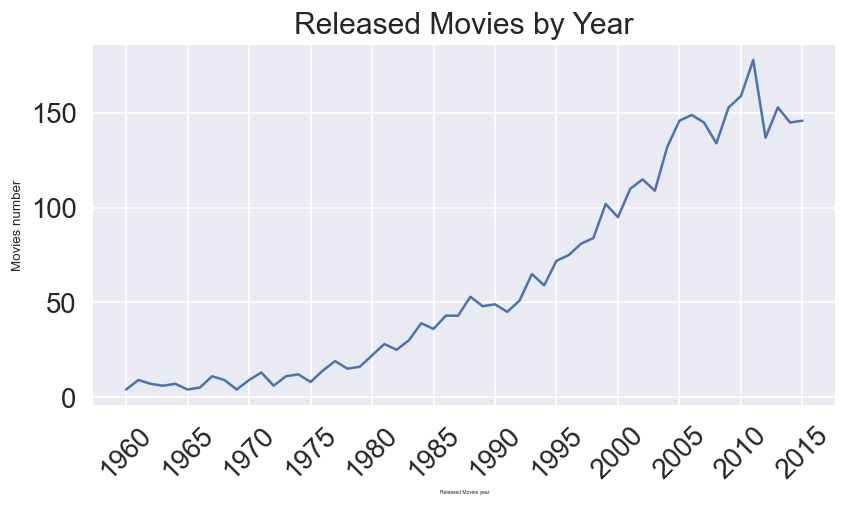

In [228]:
# Graph size(width, height)
plt.figure(figsize=(8,4), dpi = 120)

# axis labeling
plt.xlabel('Released Movies year', fontsize = 3)
plt.ylabel('Movies number', fontsize = 8)
plt.title('Released Movies by Year')
plt.locator_params( axis='x',nbins=15)
plt.plot( year_m) 
plt.xticks(rotation=45)
plt.show()

* The above figure shows the yearly increasing in movies production.
* The year '2011' has the highest production.

<a id='Q5'></a>
# 5. Which year has achieved the highest and lowest profit ?

In [229]:
# first Grouping by year then getting the profit sum.
profit_by_year = movi.groupby('release_year')['profit'].sum()

In [230]:
# Which  year has achieved the highest profitt
profit_by_year.idxmax()

2015

In [231]:
# profit Amount for the year Which achieved the highest profitt
profit_by_year[profit_by_year.idxmax()]

18888111122.0

In [232]:
# Which  year has achieved the lowest profitt
profit_by_year.idxmin()

1966

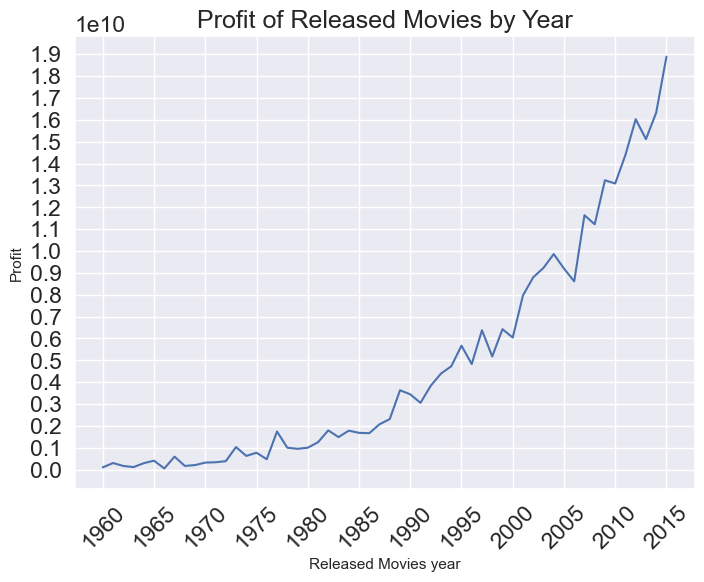

In [236]:
# Graph size(width, height)
plt.figure(figsize=(8,6), dpi = 100)

# axis labeling
plt.xlabel('Released Movies year', fontsize = 11)
plt.ylabel('Profit', fontsize = 11)
plt.title('Profit of Released Movies by Year')

# Ploting 
plt.locator_params( axis='x',nbins=15)
plt.locator_params( axis='y',nbins=25)
plt.plot(profit_by_year)
plt.xticks(rotation=45)
plt.show()

* The above figure shows that year '2015' has the  highest profit.

<a id='Q6'></a>
# 6. What are the movies which have the highest rating by voters?

In [237]:
# getting list of top 5 movies
vtr = movi.nlargest(5,'vote_average')
voters_top_10 = vtr.loc[:,['original_title', 'vote_average']].head(10)
voters_top_10

,original_title,vote_average
4178,The Shawshank Redemption,8.4
7948,Stop Making Sense,8.4
7269,The Godfather,8.3
650,Whiplash,8.2
2409,Fight Club,8.1


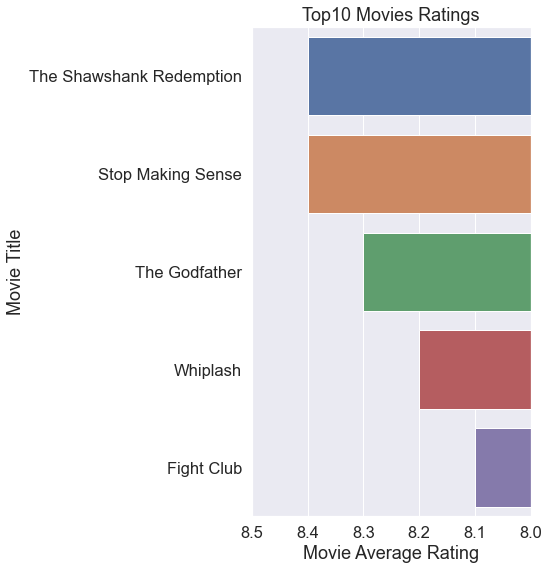

In [238]:
#visualizing top 5 movies
sns.set(font_scale=1.5);
f, ax = plt.subplots(figsize=(5, 9));
ax = sns.barplot(x='vote_average', y='original_title', data=voters_top_10);

ax.set(xlim=(8.5,8.0), ylabel="Movie Title", xlabel="Movie Average Rating");
plt.title('Top10 Movies Ratings');

* The Shawshank Redemption  movies has the highest rating by voters.

<a id='Q7'></a>
# 7. Which Movies have the most and least profit?

In [261]:
# chinging ('budget', 'revenue') to int64
movi3 = pd.DataFrame(movi).copy()
data_type=['budget', 'revenue']
movi3[data_type]=movi3[data_type].applymap(np.int64)

In [262]:
#getting earned_profit column and indexing it
movi3.insert(2,'earned_profit',movi3['revenue']-movi3['budget'])
movi3.head(2)

,id,popularity,earned_profit,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
1,76341,28.419936,228436354,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08


In [269]:
#defining calculat function to get highest and lowest profit
def calculate(column):
    #highest profit
    highest= movi3[column].idxmax()
    highest_details=pd.DataFrame(movi3.loc[highest])
    
    #lowest profit
    lowest= movi3[column].idxmin()
    lowest_details=pd.DataFrame(movi3.loc[lowest])
    
    #merging data
    merg=pd.concat([highest_details, lowest_details], axis=1)
    
    return merg

#running the function
calculate('earned_profit')

,1386,2244
id,19995,46528
popularity,9.432768,0.25054
earned_profit,2544505847,-413912431
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed


* (Avatar) movie has the highest positive earned profit 2.5 bilion.
* (The Warrior's Way) movie has the lowest negative earned profit  -414 milion.


<a id='Q8'></a>
# 8. what are the most popular movies?

In [271]:
# Grouping popularity by year and getting the sum of it.
movie_popularity = movi.groupby('original_title')['popularity'].sum()
top_10_mp = movie_popularity.nlargest(10)
top_10_mp

original_title
Jurassic World                           32.985763
Mad Max: Fury Road                       28.419936
Interstellar                             24.949134
Guardians of the Galaxy                  14.311205
Insurgent                                13.112507
Captain America: The Winter Soldier      12.971027
Star Wars                                12.037933
John Wick                                11.422751
Star Wars: The Force Awakens             11.173104
The Hunger Games: Mockingjay - Part 1    10.739009
Name: popularity, dtype: float64

>(Jurassic World) is the most popular movie in the dataset.

<a id='conclusions'></a>
# Conclusions

>Based on The Movie Database (TMDb). I figured out the following

1.	Drama is the most popular movie genre.

2.	Robert De Niro is the most popular actor.

3.	Steven Spielberg is the most popular director.

4.	Based On Novel is the most popular keywords.

5.	The analysis shows a weak correlation between runtime and popularity of movies.

6.	The analysis shows a strong correlation between profit and revenues of movies.

7.	The analysis shows a weak correlation between profit and budget of movies.

8.	The movies production is yearly increasing.

9.	The year '2011' has the highest movies production.

10.	The year '2015' has the highest profit from year 1960.

11.	The Shawshank Redemption movies has the highest rating by voters.

12.	(Avatar) movie has the highest positive earned profit 2.5 billion.

13.	(The Warrior's Way) movie has the lowest negative earned profit -414 million.

14.	(Jurassic World) is the most popular movie in the dataset.



## Limitations
> The biggest limitation I found:
* I had to remove some rows because they had missing values, otherwise it would be great to use it in making the results better. 
* Some columns had no currency unit, like budget and revenue. 
* It would be great if there is a column for the received award.
